# Lecture 1 - Introduction to the Julia Programming Language

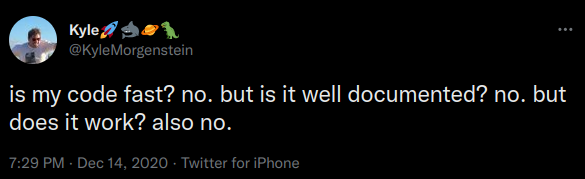

## Contents
1. [Julia - A Brief History](#julia-a-brief-history)
2. [Why Julia?](#why-julia)
3. [Arrays](#arrays)
4. [Functions](#functions)
5. [Control Flow - The for Loop](#loops)
6. [Further Reading](#further-reading)
7. [Next Week](#next-week)

## 1. Julia - A Brief History <a class="anchor" id="julia-a-brief-history"></a>

### 2012: Julia was first introduced to the world in the now famous blogpost, [Why We Created Julia](https://julialang.org/blog/2012/02/why-we-created-julia/).

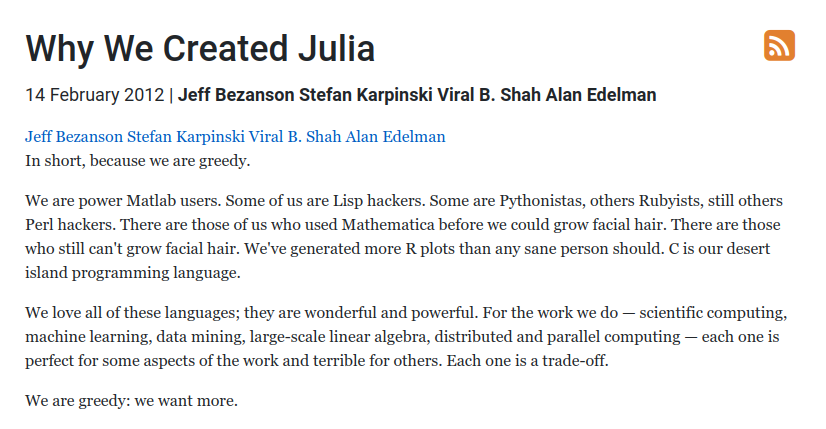

### 2017: [Julia joined Fortran, C, and C++ in the Petaflop Club](https://www.hpcwire.com/off-the-wire/julia-joins-petaflop-club/).

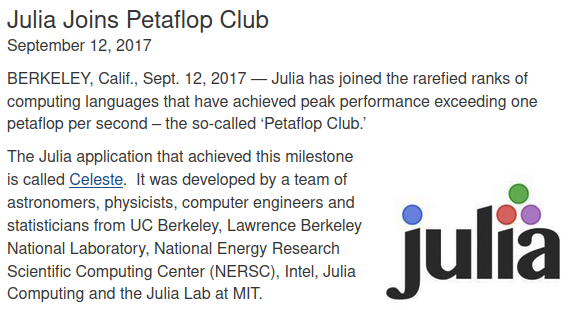

FLOP = floating-point operation

### 2018: [Julia Version 1.0 released.](https://julialang.org/blog/2018/08/one-point-zero/)
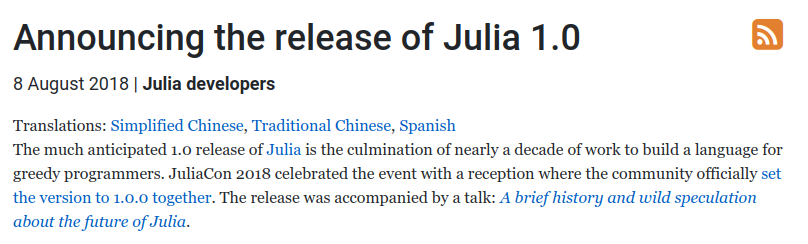

### 2022: [Why We Use Julia, 10 Years Later](https://julialang.org/blog/2022/02/10years/)

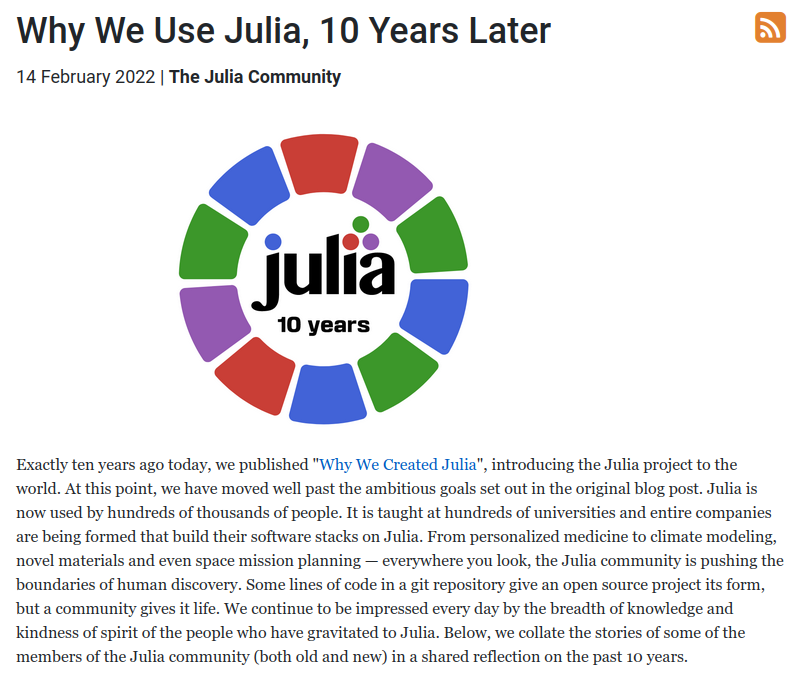

### Today: Julia usage continues to grow rapidly (in many cases, exponentially)
- All [measures of adoption](https://juliacomputing.com/blog/2022/01/newsletter-january/) (Julia downloads, registered packages, GitHub stars, citations) are increasing year by year.


- In addition to the core Julia language, there are state-of-the-art ecosystems for, amongst other things:
    - Scientific computing, e.g. [DifferentialEquations.jl](https://diffeq.sciml.ai/stable/), [ModelingToolkit.jl](https://mtk.sciml.ai/stable/)
    - Machine learning, e.g. [Flux.jl](https://fluxml.ai/Flux.jl/stable/)
    - Scientific machine learning (SciML), e.g. [DiffEqFlux.jl](https://diffeqflux.sciml.ai/dev/)
    - Countless domain-specific applications, e.g. [DynamicalSystems.jl](https://juliadynamics.github.io/DynamicalSystems.jl/latest/)
    - Automatic differentiation, e.g. [Zygote.jl](https://fluxml.ai/Zygote.jl/latest/), [Enzyme.jl](https://github.com/EnzymeAD/Enzyme.jl)
    - Plotting, e.g. [Makie.jl](https://makie.juliaplots.org/stable/)
    
    
- The next generation of climate models is being written in Julia as part of the [CliMA](https://clima.caltech.edu/) project, e.g. [Oceananigans.jl](https://github.com/CliMA/Oceananigans.jl).

## 2. Why Julia? <a class="anchor" id="why-julia"></a>

- Historically, we might divide programming languages commonly used for scientific computing into so-called **high-level** and **low-level** languages:


| Language Type | Implementation | Type System | Syntax | Speed | Examples
| :- | :- | :- | :- | :- | :- |
| High-level | [Interpreted](https://en.wikipedia.org/wiki/Interpreter_(computing)) | [Dynamic](https://en.wikipedia.org/wiki/Type_system#Dynamic_type_checking_and_runtime_type_information) | Easy, modern | Painfully slow | Python, R, Mathematica
| Low-level | [Compiled](https://en.wikipedia.org/wiki/Compiled_language) | [Static](https://en.wikipedia.org/wiki/Type_system#Static_type_checking) | Hard, obscure | Blazing fast | Fortran, C, C++


- This divide gives rise to the [**two-language problem**](https://www.nature.com/articles/d41586-019-02310-3): scientific programmes are often prototyped in a high-level language, but then have to be translated into a low-level language when speed becomes important.


- Julia aims to solve the two-language problem, giving scientists the flexibility to write code with the ease of Python while executing with the speed of Fortran or C, all inside one language.


- That is to say, Julia offers the best of both worlds:
    - it's ([JIT](https://en.wikipedia.org/wiki/Just-in-time_compilation)) **compiled**
    - it's **dynamically typed**
    - it has a **modern syntax**
    - it's **exceptionally** [**fast**](https://julialang.org/benchmarks/)
    
    
- Over the course of this lecture series, you will learn not only how and why Julia is so fast, but also how to write your own clean and efficient Julia programmes.

## 3. Arrays <a class="anchor" id="arrays"></a>
- Arrays are probably the single most important data structure in scientific computing.


- An array is simply an **ordered collection of objects**, usually all of the same type.


- Each element of an array has an **integer index**, corresponding to its relative position in the array.


- The elements of an array are **stored contiguously in your computer's memory**.


- That is, the $i$-th item in the array is stored directly adjacent to the $(i+1)$-th item. This means that the position (memory address) of each element can be calculated based only on the position of the first element and the index.


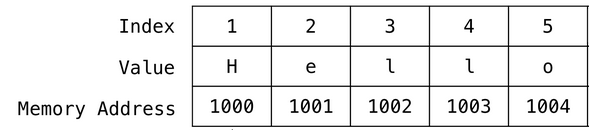
[Source (adapted)](https://dyclassroom.com/c/c-pointers-and-one-dimensional-array)


- Ultimately, this makes it extremely efficient to get or modify specific elements of an array, as awell as to traverse the entire array from start to finish.

In [1]:
hello = ["H", "e", "l", "l", "o"]

5-element Vector{String}:
 "H"
 "e"
 "l"
 "l"
 "o"

In [3]:
for letter in hello
    println(letter)
end

H
e
l
l
o


### 3.1. The Julia `Array` type

- Consistent with Julia's emphasis on technical computing, `Array` is a core data type of the Julia programming language. 

In [4]:
a = rand(3)

3-element Vector{Float64}:
 0.9378401171221775
 0.7811388112982061
 0.9086302287495366

In [5]:
typeof(a)

Vector{Float64} (alias for Array{Float64, 1})

- **Note:** `Vector` is an alias for a one-dimensional `Array`.


- What follows are some key things you need to know about Julia arrays.

#### 3.1.1. `Array` is 1-indexed

- Unlike other programming languages you might be familiar with, Julia arrays are 1-indexed rather than 0-indexed.

In [6]:
a[0]  # Attempt to get the element at position 0 of a

LoadError: BoundsError: attempt to access 3-element Vector{Float64} at index [0]

In [7]:
a[1]  # Get the first element of a

0.9378401171221775

#### 3.1.2. `Array` is mutable

- The elements of an array can be modified after it has been created.

In [8]:
a

3-element Vector{Float64}:
 0.9378401171221775
 0.7811388112982061
 0.9086302287495366

In [9]:
a[2] = 1.0  # Set the second element of a equal to 1.0
a

3-element Vector{Float64}:
 0.9378401171221775
 1.0
 0.9086302287495366

#### 3.1.3. `Array` should only contain objects of a single type

- In general, the `Array` type in Julia may contain objects of arbitrary type:

In [10]:
bad_array = [
    1.0f0,   # Float32 
    1,       # Int64
    true,    # Bool
    () -> 1, # Function
]

4-element Vector{Any}:
    1.0f0
    1
 true
     #1 (generic function with 1 method)

In [11]:
eltype(bad_array)  # eltype returns the element type of an Array object

Any

- **Do not do create arrays like this!** In practice, arrays should always contain objects of the **same concrete type**, especially in performance critical parts of your code.


- *Why do you think this is important?*


- Julia really wants your arrays to have a specific type. So much so, that if you attempt to create an `Array` containing objects of different types, Julia will attempt to [convert](https://docs.julialang.org/en/v1/manual/conversion-and-promotion/#conversion-and-promotion) them to a common type, if possible.

In [12]:
[
    1.0f0,  # Float32
    1,      # Int64
    true,   # Bool
]

3-element Vector{Float32}:
 1.0
 1.0
 1.0

#### 3.1.4. `Array` can have arbitrary dimensions

- In Julia, arrays can have **arbitrary dimensions**. You could think of an array as a finite n-dimensional grid, with an object placed at each gridpoint.

In [13]:
b = rand(3, 5)

3×5 Matrix{Float64}:
 0.0941951  0.124898  0.249895  0.384501   0.394945
 0.0386259  0.305391  0.19538   0.570421   0.591098
 0.667863   0.779141  0.580244  0.0875564  0.365805

In [14]:
typeof(b)

Matrix{Float64} (alias for Array{Float64, 2})

- **Note:** `Matrix` is an alias for a two-dimensional `Array`.

In [15]:
ndims(b)  # ndims returns the dimensionality of an Array

2

- As you might expect, we can straightforwardly create arrays of higher and higher dimensions (but it becomes harder and harder to display them).

In [16]:
c = rand(3, 3, 3, 3)

3×3×3×3 Array{Float64, 4}:
[:, :, 1, 1] =
 0.410418  0.878373  0.482401
 0.517955  0.144156  0.571365
 0.353941  0.678739  0.37461

[:, :, 2, 1] =
 0.689137  0.831314  0.894982
 0.515541  0.422888  0.799194
 0.746468  0.947321  0.068884

[:, :, 3, 1] =
 0.888936  0.756484  0.999815
 0.85446   0.953723  0.914946
 0.943208  0.651908  0.153314

[:, :, 1, 2] =
 0.373527   0.227456   0.915091
 0.0979449  0.0388342  0.0601394
 0.350579   0.404995   0.76167

[:, :, 2, 2] =
 0.370238   0.744926  0.894276
 0.0860613  0.644199  0.42124
 0.731313   0.258754  0.426602

[:, :, 3, 2] =
 0.0892105  0.315114  0.0194877
 0.40593    0.970698  0.231661
 0.259355   0.660495  0.595957

[:, :, 1, 3] =
 0.79063   0.436759  0.965986
 0.359442  0.670011  0.956927
 0.143512  0.586546  0.830518

[:, :, 2, 3] =
 0.216116  0.594927  0.526155
 0.648792  0.627606  0.21531
 0.839047  0.777008  0.158429

[:, :, 3, 3] =
 0.793157  0.00667358  0.932302
 0.167284  0.48421     0.919344
 0.602922  0.545649    0.209252

In [17]:
typeof(c)

Array{Float64, 4}

In [18]:
ndims(c)

4

### 3.2. Constructing and Initialising Arrays
#### 3.2.1. Array Literals
- One-dimensional arrays (vectors) can be directly constructed using square brackets and comma-separated elements:

In [19]:
[1.0, 2.0, 3.0]

3-element Vector{Float64}:
 1.0
 2.0
 3.0

- Elements separated by tabs or spaces are *horizontally concatenated*. This can be useful for creating matrix literals, for example:

In [20]:
[1.0 2.0 3.0]

1×3 Matrix{Float64}:
 1.0  2.0  3.0

In [21]:
a = [1, 2]; b = [4, 5]; c = [7, 8]  # vectors

[a b c]

2×3 Matrix{Int64}:
 1  4  7
 2  5  8

- Elements separated by semi-colons or newlines are *vertically concatenated*. This leads to some especially useful syntax for matrix literals:

In [22]:
[1 4 7
 2 5 8]

2×3 Matrix{Int64}:
 1  4  7
 2  5  8

#### 3.2.2. Some Useful Functions for Constructing Arrays
- Full list of functions [here](https://docs.julialang.org/en/v1/manual/arrays/#Construction-and-Initialization). 


- In all of the following functions, `T` is the element type of the array. If the argument `T` is omitted, it defaults to `Float64`.


- Functions like this are useful, for example, when you wish to [pre-allocate](https://docs.julialang.org/en/v1/manual/performance-tips/#Pre-allocating-outputs) the output of some function or procedure.

1. `zeros(T, dims...)` - an array of all zeroes.

In [23]:
zeros(3, 4)

3×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

2. `ones(T, dims...)` - an array of all ones.

In [24]:
ones(3, 4)

3×4 Matrix{Float64}:
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0

3. `rand(T, dims...)` - an array with random, iid and uniformly distributed values in the half-open interval `[0, 1)`.

In [25]:
rand(3, 4)

3×4 Matrix{Float64}:
 0.475096  0.00980856  0.296453  0.268477
 0.276295  0.036986    0.176101  0.6718
 0.634249  0.195061    0.763914  0.342322

4. `randn(T, dims...)` - an array with random, iid and standard normally distributed values.

In [26]:
randn(3, 4)

3×4 Matrix{Float64}:
  0.957297  -1.73218    0.264859    1.46087
  1.70838   -0.269121  -0.0481334  -0.401288
 -0.437461   1.73324   -0.280961   -1.34284

5. `similar(A)` - create an uninitialized array with the same element type and size as the array `A`.

In [27]:
A = rand(3, 4);
B = similar(A)

3×4 Matrix{Float64}:
 6.92929e-310  6.92929e-310  6.92929e-310  6.92929e-310
 6.92929e-310  6.92929e-310  6.92929e-310  6.92929e-310
 6.92929e-310  6.92929e-310  6.92929e-310  5.0e-324

6. `fill(x, dims...)` - return an array filled with the value `x`.

In [28]:
fill(π, 3, 4)

3×4 Matrix{Irrational{:π}}:
 π  π  π  π
 π  π  π  π
 π  π  π  π

7. `fill!(A, x)` - fill the array `A` with the value `x`.

In [29]:
A = rand(3, 4)

3×4 Matrix{Float64}:
 0.759831   0.174474   0.260825  0.602547
 0.0254775  0.0396479  0.772579  0.403168
 0.923658   0.375772   0.630792  0.544221

In [30]:
B = fill!(A, π)

3×4 Matrix{Float64}:
 3.14159  3.14159  3.14159  3.14159
 3.14159  3.14159  3.14159  3.14159
 3.14159  3.14159  3.14159  3.14159

In [31]:
A

3×4 Matrix{Float64}:
 3.14159  3.14159  3.14159  3.14159
 3.14159  3.14159  3.14159  3.14159
 3.14159  3.14159  3.14159  3.14159

- **Note:** A function name ending with `!` indicates that the function modifies its arguments "in-place".

### 3.3. Array Indexing
- The general syntax for indexing into an n-dimensional array `A` is:

    `A[I_1, I_2, ..., I_n]`,

    where each `I_k` may be a scalar integer, an array of integers, or any other supported index (see the [docs]((https://docs.julialang.org/en/v1/manual/arrays/#man-supported-index-types)) for other supported indices).

In [32]:
A = rand(3, 4, 6);

In [33]:
A[2, 1, 2]

0.7889432034344526

In [34]:
A[2, 1, [1,2]]

2-element Vector{Float64}:
 0.6037828167231223
 0.7889432034344526

In [35]:
A[2, 1, 1:3]

3-element Vector{Float64}:
 0.6037828167231223
 0.7889432034344526
 0.97763405146162

- The `end` keyword may be used to indicate the last index in a given dimension.

In [36]:
A[2, end, 1:3]

3-element Vector{Float64}:
 0.07519583543066677
 0.3186039267289624
 0.7969117348485542

### 3.4. Indexed Assignment
- Remember, arrays are mutable!


- Similar to array indexing, the general syntax for assigning values in an n-dimensional array `A` is:

    `A[I_1, I_2, ..., I_n] = X`,

    where each `I_k` may be a scalar integer, an array of integers, or any other supported index.

In [37]:
A = rand(3, 4);
A[1, 2] = 2
A

3×4 Matrix{Float64}:
 0.246159   2.0       0.328607  0.415492
 0.0476819  0.8325    0.353459  0.323932
 0.338919   0.890935  0.926681  0.102624

- If any index `I_k` is itself an array, then the right hand side `X` must also be an array with the same shape as the result of indexing `A[I_1, I_2, ..., I_n]` or a vector with the same number of elements. 

In [38]:
A[1, [1,2]] = [3, 4]
A

3×4 Matrix{Float64}:
 3.0        4.0       0.328607  0.415492
 0.0476819  0.8325    0.353459  0.323932
 0.338919   0.890935  0.926681  0.102624

- The element-wise assignment operator `.=` may be used to broadcast `X` across the selected locations:

    `A[I_1, I_2, ..., I_n] .= X`

In [39]:
A = rand(3, 4);
A[1, :] .= 1.0;
A

3×4 Matrix{Float64}:
 1.0        1.0       1.0       1.0
 0.446955   0.151028  0.691981  0.327941
 0.0793242  0.513616  0.744478  0.560801

### 3.5. Growing and Shrinking an Array
- Use `push!` to add an item to the end of a (one-dimensional) array. This extends the array.

In [40]:
a = rand(3)

3-element Vector{Float64}:
 0.7547496361928506
 0.7567891255045351
 0.5616130540943602

In [47]:
push!(a, π)

10-element Vector{Float64}:
 0.7547496361928506
 0.7567891255045351
 0.5616130540943602
 3.141592653589793
 3.141592653589793
 3.141592653589793
 3.141592653589793
 3.141592653589793
 3.141592653589793
 3.141592653589793

- Use `pop!` to get an item from the end of a (one-dimensional) array. This shrinks the array.

In [56]:
pop!(a)

3.141592653589793

In [57]:
a

3-element Vector{Float64}:
 0.7547496361928506
 0.7567891255045351
 0.5616130540943602

- *Why do we usually prefer adding items to and removing items from the **end** of an array? What happens if we add an item in the middle of an array?*

## 4. Functions  <a class="anchor" id="functions"></a>
- At a high level, functions in Julia are conceputally similar to mathematical functions: they map inputs to return values.

### 4.1. Defining Functions

- There are three main ways of defining a function in Julia.

#### 4.1.1. Standard Function Definition Syntax 

- This is probably the form you'll see and use most often.

In [58]:
function f(x, y)
    x + y
end

f (generic function with 1 method)

In [59]:
f(1, 2)

3

#### 4.1.2. Compact "Assignment Form" Syntax

- Short, one-line functions can be written in "assignment form", exactly how you would write them down mathematically.

In [60]:
f(x, y) = x + y

f (generic function with 1 method)

#### 4.1.3. Anonymous Functions

- Functions don't have to be given a name; they can also be created "anonymously".


- Anonymous functions are often used when passing a function as an argument to another function. For example, to square all of the elements in an array, we could use `map` together with an anonymous function:

In [61]:
numbers = [1, 2, 3, 4]

4-element Vector{Int64}:
 1
 2
 3
 4

In [63]:
map(x -> x^2, numbers)

4-element Vector{Int64}:
  1
  4
  9
 16

- Anonymous functions can also be assigned to a variable.

In [64]:
(x, y) -> x + y

#7 (generic function with 1 method)

In [66]:
a = x -> x^2

#9 (generic function with 1 method)

- To call an anonymous function which has been assigned to a variable, simply call the variable it is assigned to like a regular function.

In [67]:
a(5)

25

#### 4.1.4. Example function definition: Lotka-Volterra (predator-prey) equations

- The Lotka-Volterra system is a classic dynamical system you will encounter often in these lectures.


- It describes the interaction between two species, where one acts as a predator and the other as prey.


- The rate of change of the predator and prey populations are determined by the nonlinear differential equations

$$
\begin{aligned}
\frac{dx}{dt} & = \alpha x - \beta xy \\[3pt]
\frac{dy}{dt} & = \delta xy - \gamma y \\[3pt]
\end{aligned}
$$

where $x$ and $y$ are the prey and predator populations, respectively, and $\alpha, \beta, \delta, \gamma$ are positive real parameters describing the interation of the two species.

- Let's write a function to calculate both $\frac{dx}{dt}$ and $\frac{dy}{dt}$, given the instantaneous state $u = (x,y)$ of the system and some parameters $p=(\alpha, \beta, \delta, \gamma)$.

In [68]:
function lotka_volterra(u, p)
    x, y = u
    alpha, beta, delta, gamma = p
    
    dx = alpha * x - beta * x * y
    dy = delta * x * y - gamma * y
    
    return dx, dy
end

lotka_volterra (generic function with 1 method)

In [69]:
lotka_volterra(rand(2), rand(4))

(0.08683991602239716, -0.5873372566518648)

In [71]:
function lotka_volterra(u, p)
    x, y = u
    α, β, δ, γ = p
    
    dx = α * x - β * x * y
    dy = δ * x * y - γ * y
    
    return dx, dy
end

lotka_volterra (generic function with 1 method)

In [72]:
lotka_volterra(rand(2), rand(4))

(-0.0350777635449141, -0.08539509517383345)

In [73]:
function lotka_volterra(u, p)
    🦊, 🐇 = u
    α, β, δ, γ = p
    
    d🦊 = α * 🦊 - β * 🦊 * 🐇
    d🐇 = δ * 🦊 * 🐇 - γ * 🐇
    
    return d🦊, d🐇
end

lotka_volterra (generic function with 1 method)

In [74]:
lotka_volterra(rand(2), rand(4))

(0.249197295416141, -0.024779206109669105)

- Aside: Julia supports [Unicode input](https://docs.julialang.org/en/v1/manual/unicode-input/). To add a Unicode character to your code, simply type a backslash followed by the LaTeX-like abbreviation corresponding to that character.


- As a scientist, this means you can achieve a **one-to-one correspondence between equations and code**, greatly improving (in my strong opinion) the readability and correctness of your code.

### 4.2. Calling Functions
- Functions are called with the standard parenthesis syntax.

In [75]:
u = rand(2)
p = rand(4)
lotka_volterra(u, p)

(-0.19132784117300133, -0.15962096590128433)

### 4.3. Returning from Functions
- By default, a function will return the value of the **last expression evaluated**.

In [76]:
function add_three(x, y, z)
    a = x + y
    a + z  # this is the last expression in my function
end

add_three (generic function with 1 method)

In [77]:
add_three(1, 2, 3)

6

- Alternatively, a value can be returned explicitly using the `return` keyword.

In [78]:
function add_two(x, y, z)
    return a = x + y
    a + z  # this code is unreachable, is never evaluated
end

add_two (generic function with 1 method)

In [79]:
add_two(1, 2, 3)

3

- This is useful, for example, when some control flow exists in your function and the desired logic depends on the values of the inputs. In such a case, you can control the behaviour of the function with the `return` keyword.

In [80]:
function my_dumb_operator(a, b, operation)
    if operation == :add
        return a + b
    elseif operation == :subtract
        return a - b
    else
        error("operation must be either :add or :subtract")
    end
    println("This code is unreachable!")
end

my_dumb_operator (generic function with 1 method)

In [82]:
my_dumb_operator(1, 2, :subtract)

-1

- Many functions do not return anything (for example, if they do file I/O, or if they modify their arguments in-place). In this case, the Julia convention is to explicitly `return nothing`.

In [87]:
function say_hello()
    println("Hello, world!")
    return nothing  # this makes your code easy to understand and reason about
end

say_hello (generic function with 1 method)

In [86]:
say_hello()

Hello, world!


- Multiple values can also be returned from a function:

In [88]:
function self_and_square(x)
    return x, x^2  # each value to be returned is separated by a comma
end

self_and_square (generic function with 1 method)

In [90]:
x, x² = self_and_square(2)

(2, 4)

In [93]:
y = self_and_square(2)

(2, 4)

In [94]:
typeof(y) # more on tuples later

Tuple{Int64, Int64}

### 4.4. Functions with Default Arguments
- Function arguments can be given default values using the assignment operator `=` in the function signature.


- Arguments with defaults are then **optional** - you can call the function with or without them.

In [95]:
function calculate_pay_with_bonus(hours, rate, bonus = 0.0)
   return hours * rate + bonus
end

calculate_pay_with_bonus (generic function with 2 methods)

In [103]:
calculate_pay_with_bonus(10, 15)

150.0

In [104]:
calculate_pay_with_bonus(10, 15, 20)

170

- This function can now be called with either two or three arguments.

### 4.5. Functions with Keyword Arguments
- All of the functions we've seen so far have **positional arguments**; functions are defined with arguments in a particular order and must then be called with the arguments provided in precisely the same order.


- For functions with many arguments, this can quickly become confusing and a potential source of errors. Instead, you should consider **keyword arguments**.


- Keyword arguments are **passed by name** rather than position.


- Keyword arguments can be **passed in any order**.


- For functions with many arguments, this will make your code more readable and less prone to errors.


- When defining a function, **keyword arguments are separated from positional arguments by a semi-colon**.

In [105]:
function calculate_pay_with_bonus(hours, rate; bonus = 0.0)
   return hours * rate + bonus
end

calculate_pay_with_bonus (generic function with 2 methods)

In [106]:
calculate_pay_with_bonus(10, 15, bonus = 20)

170

In [108]:
function calculate_pay_with_bonus_and_tip(hours, rate; bonus = 0.0, tip = 0.0)
   return hours * rate + bonus + tip
end

calculate_pay_with_bonus_and_tip (generic function with 1 method)

In [111]:
calculate_pay_with_bonus_and_tip(10, 15, bonus = 20, tip = 10)

180

## 5. Control Flow - The `for` Loop <a class="anchor" id="loops"></a>

- Often in scientific programming we want to repeat some algorithmic procedure a number of times, e.g. until some condition is satisfied or over a given range of values. This kind of repeated evaluation is typically achieved using a loop construct.

### 5.1. The `for` Loop

- The most common loop in Julia is the `for` loop.

In [112]:
for i = 1:5
    println(i)
end

1
2
3
4
5


- The `for` loop can also iterate over all the items of a container (e.g. `Array`, `Tuple`), not just a range object:

In [115]:
range = [1, 2, 3, 4, 5]
for i in range
    println(i)
end

1
2
3
4
5


- **Note:** when iterating over a container, the Julia convention is to use the equivalent `in` keyword, but it's entirely equivalent to using `=`.


- In the most general case, any Julia object implementing the [iteration interface](https://docs.julialang.org/en/v1/manual/interfaces/#man-interface-iteration) may be iterated over in a `for` loop.

### 5.2. Early Stopping: The `break` keyword
- A loop can be terminated immediately using the `break` keyword.

In [116]:
for i = 1:5
    println(i)
    if i == 3
        break
    end
end

1
2
3


### 5.3. Jumping Ahead: The `continue` keyword
- All or part of the loop body can be skipped using the `continue` keyword. The next iteration will then be started immediately.

In [117]:
for i = 1:10
   if i % 3 != 0
       continue
   end
   println(i)
end

3
6
9


### 5.4. The `Range` Object
- We've been using ranges, e.g. `1:10`, frequently. This is a very useful construct for generating sequences of numbers and takes the general form:

    ```julia
    a:b:c
    ```

    where `a` is the starting number, `c` is the ending number, and `b` is the stepsize. By default `b = 1`.
    

- **Note:** ranges in Julia are **inclusive**.
    
    
- How could we simplify the previous loop using an appropriate `Range` object?

In [119]:
for i = 3:3:10
    println(i)
end

3
6
9


- **Tip**: Convert any `Range` object into an `Array` of its members using the `collect` function.

In [120]:
collect(1:3)

3-element Vector{Int64}:
 1
 2
 3

- **Tip**: `Range` objects can also be used in `Array` indexing.

In [121]:
a = rand(3,4)

3×4 Matrix{Float64}:
 0.272434  0.790068  0.493139  0.689456
 0.859661  0.440061  0.192637  0.116401
 0.836843  0.997184  0.563465  0.743294

In [122]:
a[1, 1:2]  # inclusive!

2-element Vector{Float64}:
 0.27243363810946675
 0.7900675469069954

### 5.5. Nested Loops
- Loops can be nested arbitrarily:

In [123]:
for i = 1:2  # outer loop
    for j = 3:4  # inner loop
        println((i, j))  # Cartesian product of 1:2 and 3:4
        break            # breaks only the innermost enclosing loop
    end
end

(1, 3)
(2, 3)


- In Julia, nested loops can be combined into a single outer loop:

In [124]:
for i = 1:2, j = 3:4
    println((i, j))
    break
end

(1, 3)


- Are the two forms of the nested loop equivalent?

## 6. Further Reading <a class="anchor" id="further-reading"></a>
1. These notes draw heavily on the official Julia [documentation](https://docs.julialang.org/en/v1/). For a more detailed introduction, see in particular the sections on:
    - [Multi-dimensional Arrays](https://docs.julialang.org/en/v1/manual/arrays/)
    - [Functions](https://docs.julialang.org/en/v1/manual/functions/)
    - [Control Flow](https://docs.julialang.org/en/v1/manual/control-flow/)
    

2. There is a huge amount of material, both introductory and advanced, on the YouTube channel of the [Julia Programming Language](https://www.youtube.com/c/TheJuliaLanguage).


3. I like Tim Holy's [short course](https://www.youtube.com/watch?v=x4oi0IKf52w&list=PL-G47MxHVTewUm5ywggLvmbUCNOD2RbKA) on scientific programming in Julia.

## 7. Next Week <a class="anchor" id="next-week"></a>
1. [Pkg.jl](https://pkgdocs.julialang.org/v1/), the Julia package manager.
2. Solving differential equations in Julia using [DifferentialEquations.jl](https://diffeq.sciml.ai/stable/).
2. Introduction to [Git](https://git-scm.com/) and [GitHub](https://github.com/).